In [5]:
directory=r'D:\College\Deep Learning\Alzheimer_s Dataset\train'

In [24]:
test_directory=r'D:\College\Deep Learning\Alzheimer_s Dataset\test'

In [6]:
import tensorflow as tf

In [7]:
import numpy as np

In [8]:
dataset = tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='grayscale',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 5121 files belonging to 4 classes.


In [9]:
class_names = dataset.class_names
print(class_names)


['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


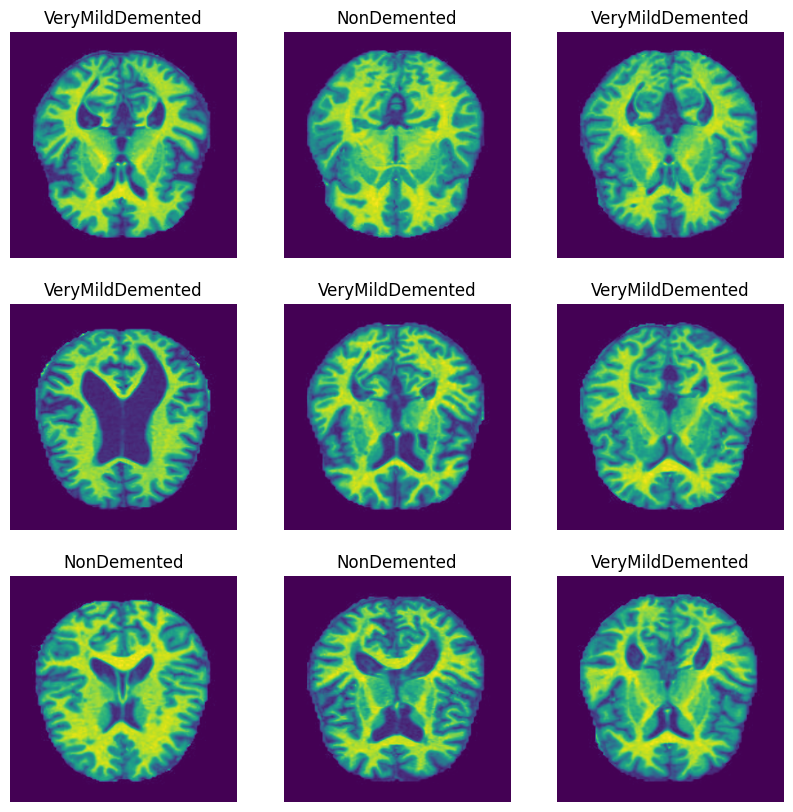

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis("off")


In [ ]:
#rescaling =  tf.keras.layers.Rescaling(scale=1./255) can be applied as a layer while making the model

In [ ]:
input_shape = (4, 28, 28, 3)
x = tf.random.normal(input_shape)
y = tf.keras.layers.Conv2D(
2, 3, activation='relu', input_shape=input_shape[0:])(x)
print(y.shape)

In [12]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [16]:
physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [17]:
from tensorflow.keras import datasets, layers, models

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(4))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 230400)            0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

with tf.device('/GPU:0'):
    history = model.fit(x = dataset,epochs=10)


Epoch 1/10
161/161 [==============================] - 19s 113ms/step - loss: 0.9227 - accuracy: 0.5766
Epoch 2/10
161/161 [==============================] - 18s 113ms/step - loss: 0.8175 - accuracy: 0.6266
Epoch 3/10
161/161 [==============================] - 18s 113ms/step - loss: 0.6875 - accuracy: 0.7014
Epoch 4/10
161/161 [==============================] - 18s 113ms/step - loss: 0.5497 - accuracy: 0.7661
Epoch 5/10
161/161 [==============================] - 18s 113ms/step - loss: 0.5134 - accuracy: 0.7862
Epoch 6/10
161/161 [==============================] - 18s 113ms/step - loss: 0.2915 - accuracy: 0.8813
Epoch 7/10
161/161 [==============================] - 18s 113ms/step - loss: 0.1524 - accuracy: 0.9447
Epoch 8/10
161/161 [==============================] - 18s 114ms/step - loss: 0.0814 - accuracy: 0.9732
Epoch 9/10
161/161 [==============================] - 18s 113ms/step - loss: 0.1733 - accuracy: 0.9371
Epoch 10/10
161/161 [==============================] - 18s 113ms/step - l

In [25]:
test_data = tf.keras.utils.image_dataset_from_directory(
    test_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=None,
    color_mode='grayscale',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
)


Found 1279 files belonging to 4 classes.


In [26]:
print("Evaluate on test data")
results = model.evaluate(x = test_data)
print("test loss, test acc:", results)

Evaluate on test data
40/40 [==============================] - 3s 62ms/step - loss: 4.4745 - accuracy: 0.5715
test loss, test acc: [4.474470138549805, 0.5715402364730835]
